# Q1

In [1]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt

### Dataset Creation

In [2]:
def generate_dataset(gamma):
    
    # Set a random seed for reproducibility
    np.random.seed(42)

    # Number of data points per class (1000/2)
    num_points = 500

    # Initialise covariance matrix
    cov = np.array([[1, 0.2], [0.2, 1]])

    # Randomise coordinates of mean for first cluster
    x = np.random.randint(-10,10)
    y = np.random.randint(-10,10)
    mean1 = [x,y]
    
    # Initialising angle with random value between 0 to 2pi (in radians)
    theta = np.random.uniform(0, 2 * np.pi)
    
    ''' To find second mean at distance of gamma, 
    making use of distance vector projection d*cos(theta) and d*sin(theta) '''
    x2 = x + gamma * np.cos(theta)
    y2 = y + gamma * np.sin(theta)
    mean2 = [x2,y2]

    # Generate class -1 points
    class1_x = np.random.multivariate_normal(mean1, cov, num_points)
    # Generate labels
    class1_y = np.ones(num_points) * -1

    # Generate class 1 points
    class2_x = np.random.multivariate_normal(mean2, cov, num_points)
    # Generate labels
    class2_y = np.ones(num_points)

    # Combine the data points and create labels
    x_data = np.concatenate((class1_x, class2_x))
    y_data = np.concatenate((class1_y, class2_y))

    # Return combined dataset
    return (class1_x, class1_y, class2_x, class2_y, x_data, y_data)

### Plotting dataset (without training classifier)

In [3]:
def plot_dataset(i,x1, x2, x):
    
    # X axis values
    X = np.linspace(min(x[:, 0]), max(x[:, 0]),100)
    
    # Default Y axis values
    Y = np.zeros(100,)
    
    # Plotting initially untrained classifier
    plt.plot(X, Y, '-r', label='W')
    
    # Plotting points of class -1
    plt.scatter(x1[:, 0], x1[:, 1], label='Class -1', marker='o')
    
    # Plotting points of class 1
    plt.scatter(x2[:, 0], x2[:, 1], label='Class 1', marker='x')
    
    # Plotting dataset with title, axis labels and legend
    plt.title(f'Dataset {i+1} Before Training')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.legend()
    
    # Displaying the graph
    plt.show()

## The Perceptron Training Algorithm

In [4]:
def train_perceptron(x, y, num_samples):
    
    # Initialising weights with random values from a uniform distribution
    weights = np.random.uniform(low=0, high=10, size=(2,))
    
    # Initialising bias with a random ineteger
    bias = np.random.randint(1,10)
    
    # Initialising number of weight changes for one time running of perceptron algorithm to 0
    nb_changes=0
    
    # Initialising maximum number of epochs(iterations)
    max_epochs=1000
    
    # Iterating for max number of iteration (set to 1000)
    for e in range(max_epochs):
        
        # Initialising misscalisified points in a sample to 0
        misclassified = 0
        
        # Iterating over each sample
        for i in range(num_samples):
            
            # Using the formula y = wTx + b
            y_pred = np.dot(x[i], weights) + bias
            
            ''' If prediction and true y are different (i.e., one belongs to class 1 and other to class -1)
            then product is negative, which implies misclassification '''
            if y_pred * y[i] <=0:
                
                # Incrementing number of weight changes
                nb_changes +=1
                
                # Incrementing number of misclassified points
                misclassified +=1
                
                # Updating weights and bias
                weights += y[i] * x[i]
                bias += y[i]

        # Check if no misclassification
        if misclassified == 0:
            break

    return (weights,bias,nb_changes)

### Plotting trained classifier

In [5]:
def plot_trained_decision_boundary(i, j, x1, x2, x, w, b):
    
    # X axis values
    X = np.linspace(min(x[:, 0]), max(x[:, 0]),100)
    
    # Learned Y-axis values
    Y = ((-w[0] * X - b) / w[1])
    
    # Plotting the trained classifier
    plt.plot(X, Y, '-r', label='W')
    
    # Plotting points of class -1
    plt.scatter(x1[:, 0], x1[:, 1], label='Class -1', marker='o')
    
    # Plotting points of class 1
    plt.scatter(x2[:, 0], x2[:, 1], label='Class 1', marker='x')
    
    # Plotting dataset, trained classifer with title, axis labels and legend
    plt.title(f'Dataset {i+1} After Training in Execution {j+1}')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.legend()
    
    # Displaying the graph
    plt.show()

### Running the perceptron algorithm

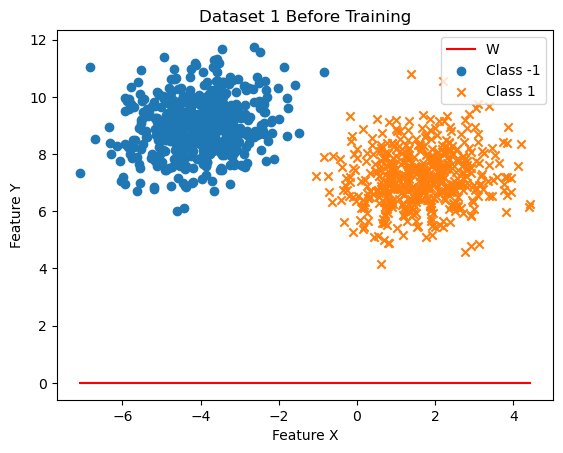

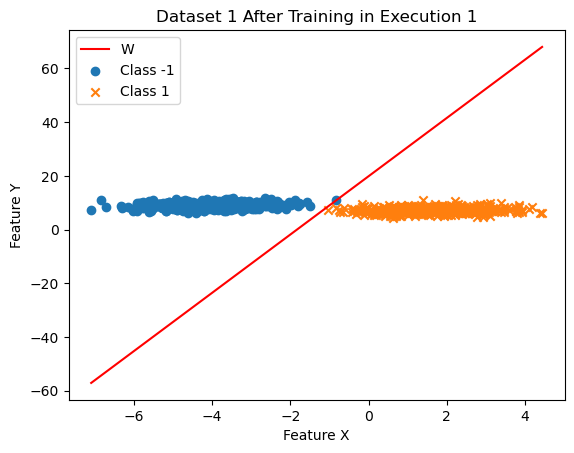

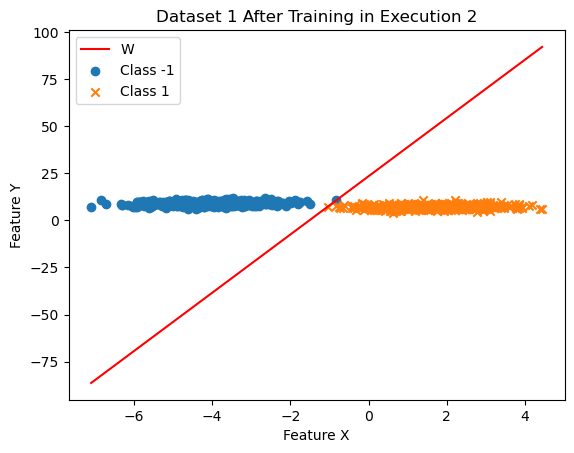

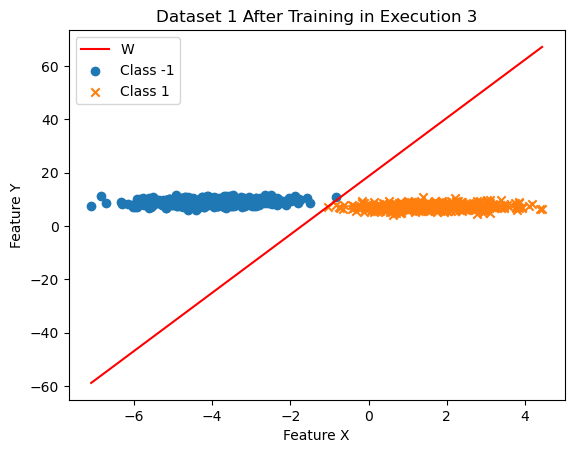

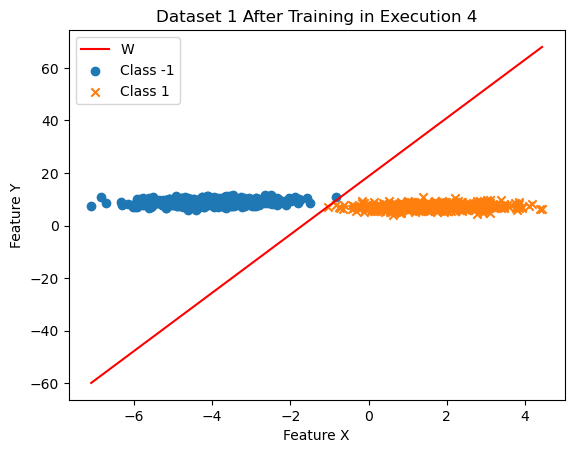

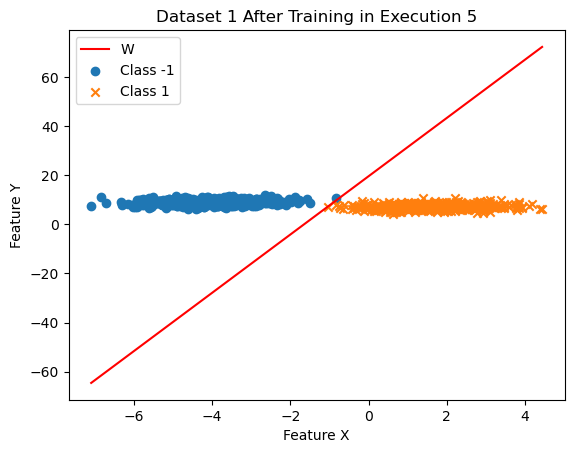

Average value of k for Dataset 1 with the Level of Separability (gamma) as 6 is:  533.6
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


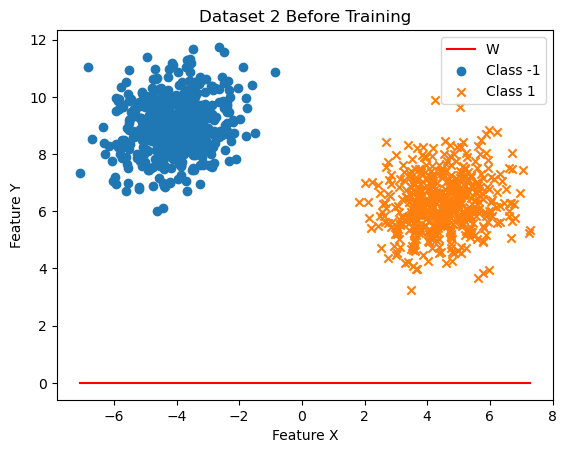

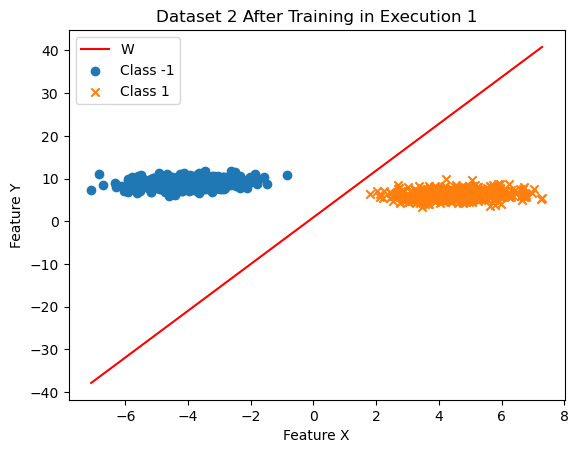

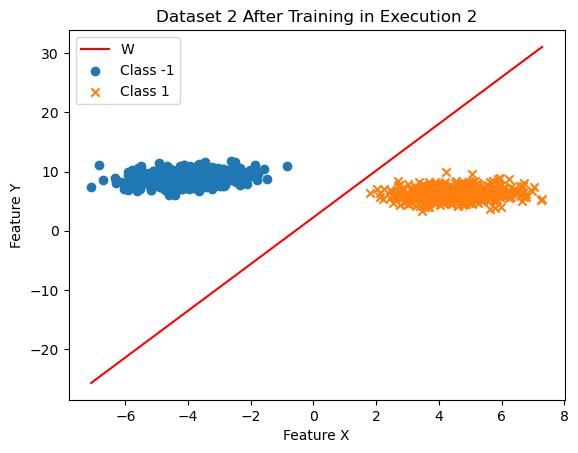

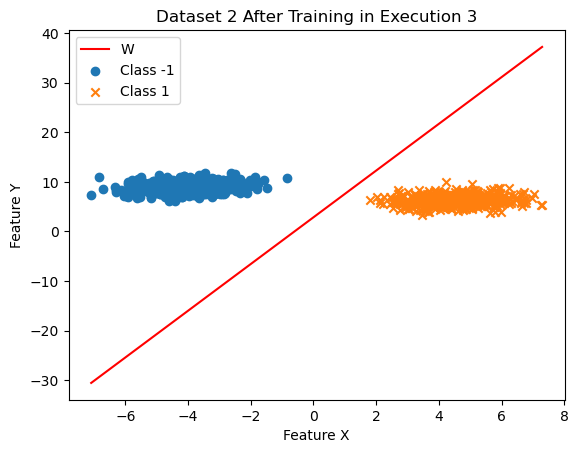

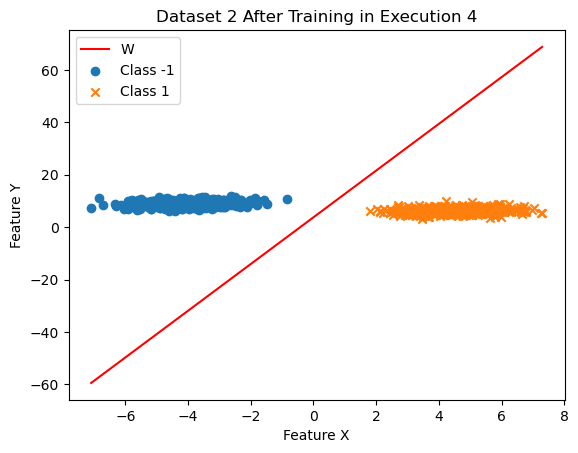

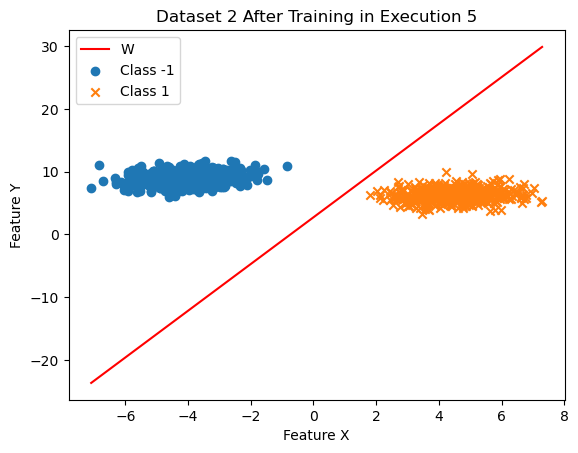

Average value of k for Dataset 2 with the Level of Separability (gamma) as 9 is:  2.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


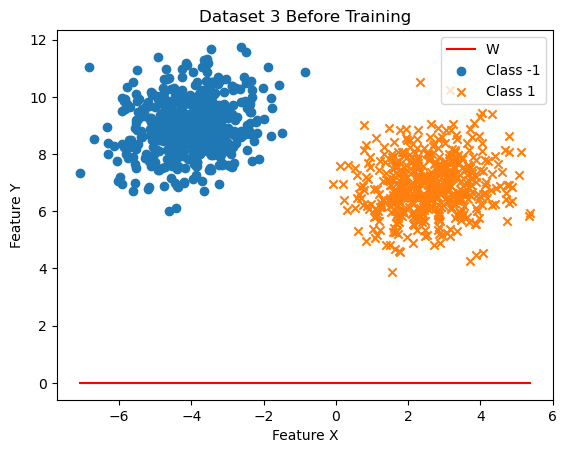

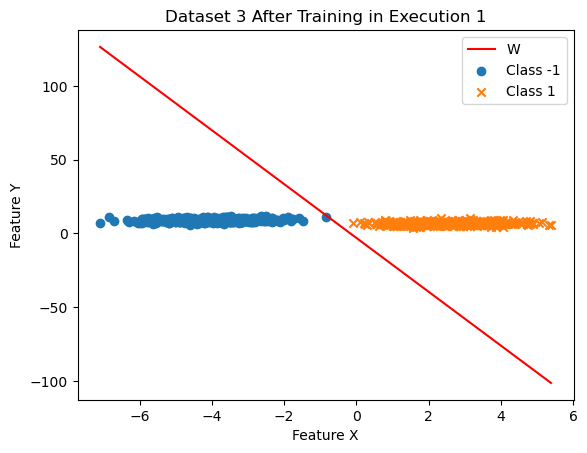

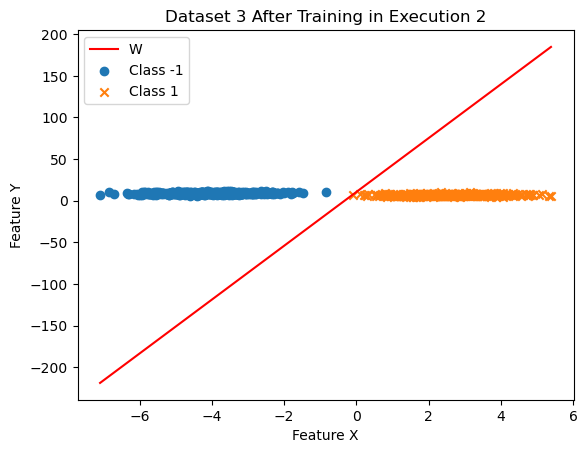

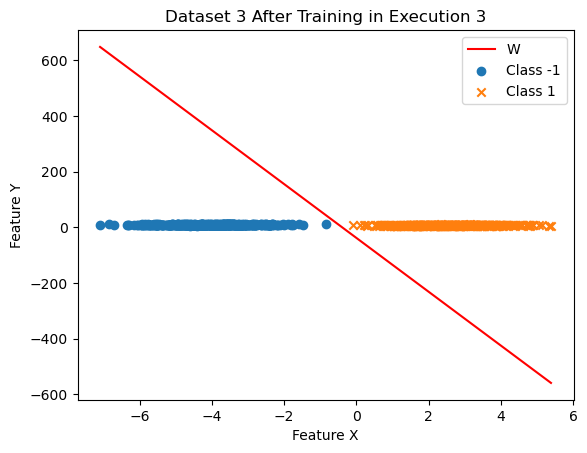

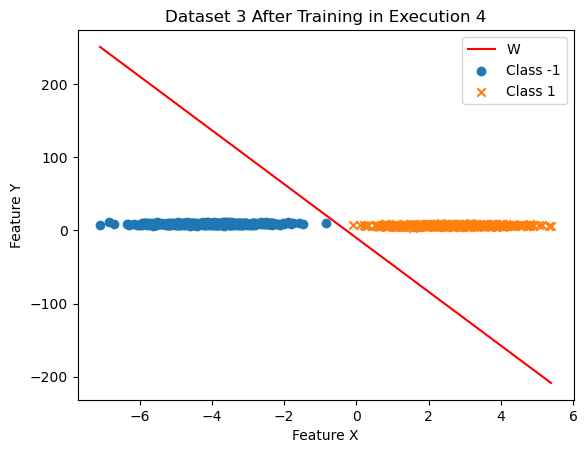

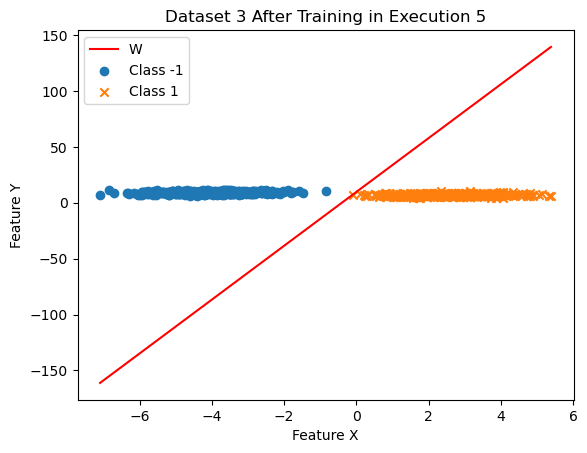

Average value of k for Dataset 3 with the Level of Separability (gamma) as 7 is:  13.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


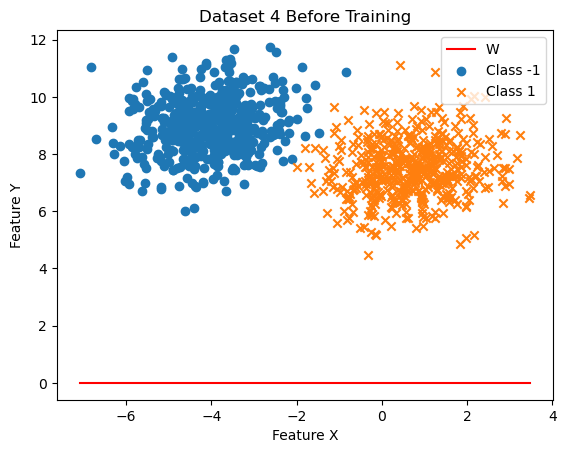

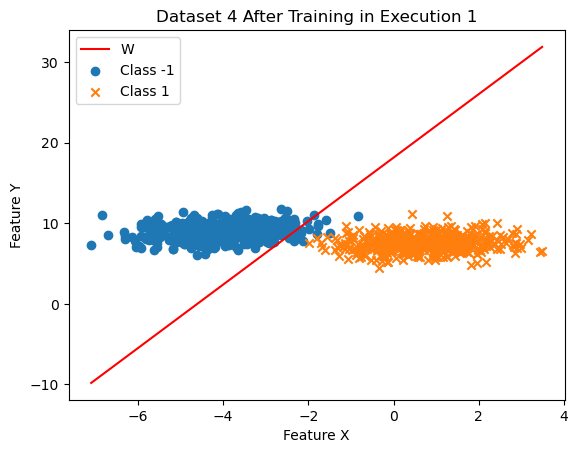

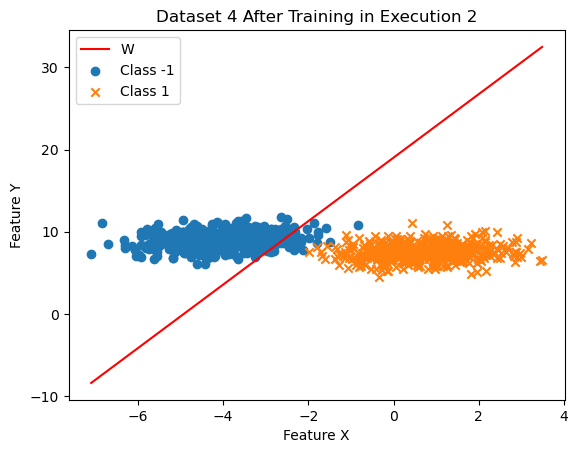

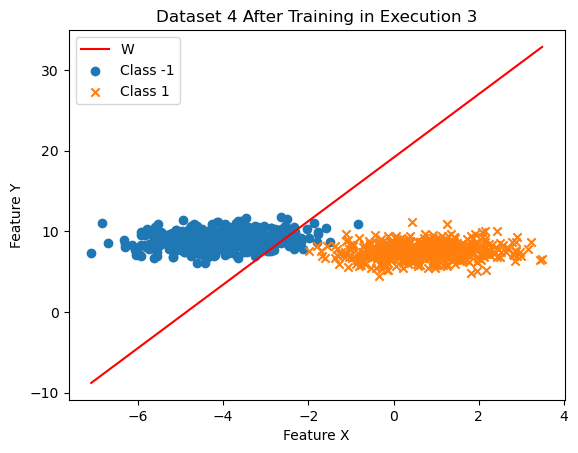

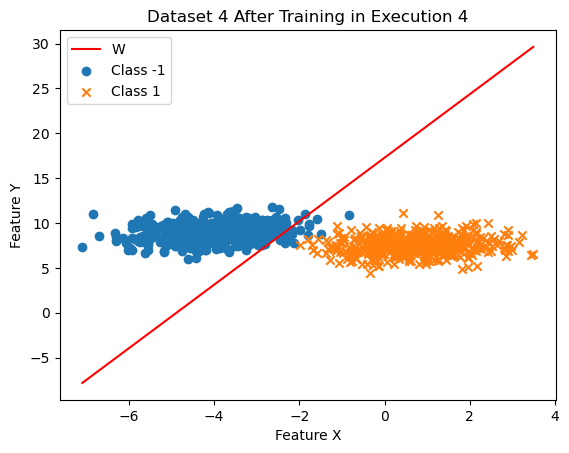

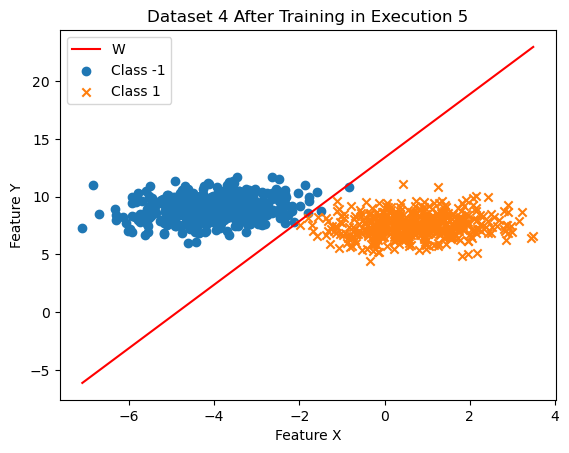

Average value of k for Dataset 4 with the Level of Separability (gamma) as 5 is:  2853.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


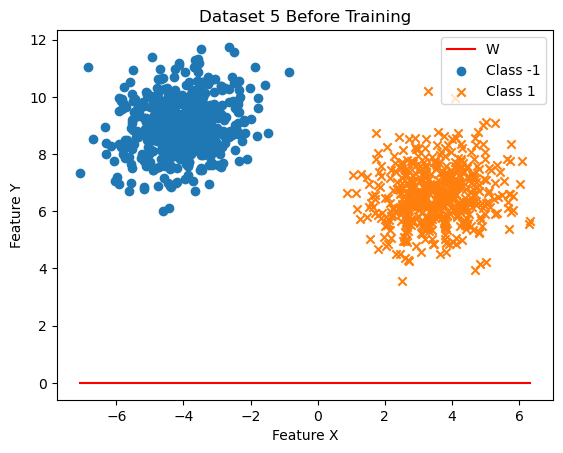

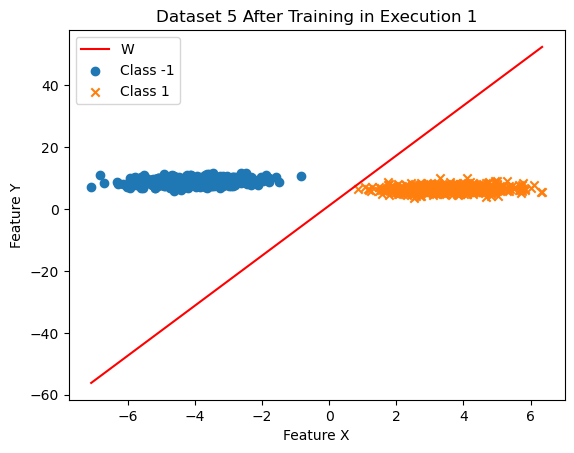

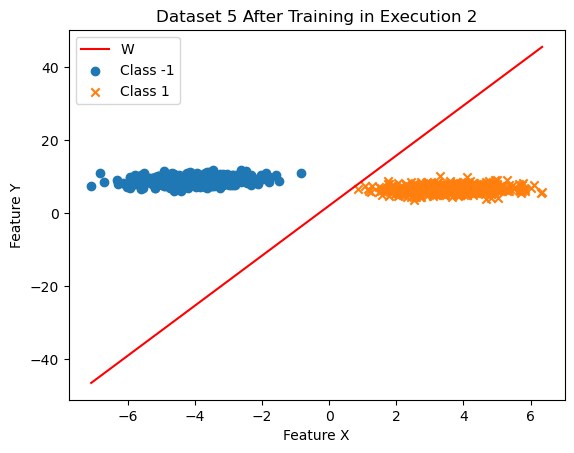

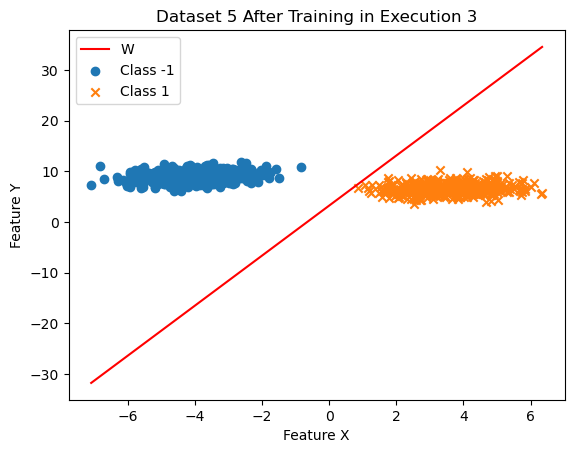

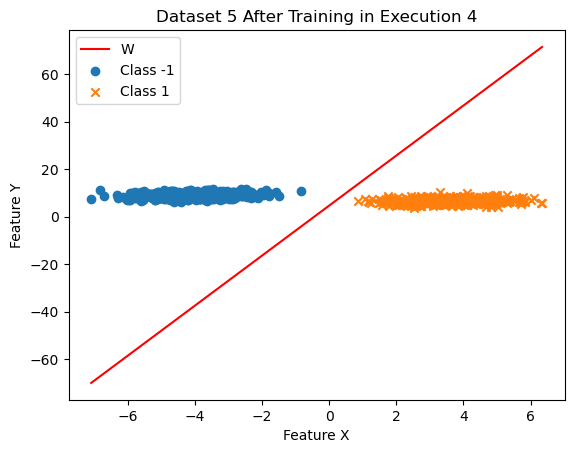

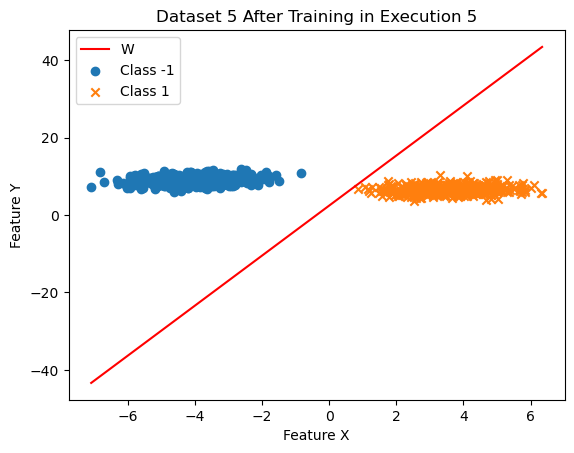

Average value of k for Dataset 5 with the Level of Separability (gamma) as 8 is:  5.8
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [6]:
# Initialising list to append k values (weight change values)
k_list = []

# Set a random seed for reproducibility
np.random.seed(42)

# Taking five random values of gamma
gamma = np.random.choice(np.arange(5, 10), size=5, replace=False)

# Enumerating over all values of gamma
for i,separability in enumerate(gamma):
    
    # Generating a linearly separable dataset
    class1_x, class1_y, class2_x, class2_y, x_data, y_data = generate_dataset(separability)
    
    # Plotting dataset
    plot_dataset(i,class1_x, class2_x, x_data)
    
    # Assigning number of sample value as number of rows in data
    num_samples = x_data.shape[0]
    
    # Initialising k value (weight change value)
    k=0
    
    # Running perceptron algorithm 5 times for each value of gamma
    for j in range(5):
        
        # Running the perceptron training algorithm
        Weights, Bias, K = train_perceptron(x_data, y_data, num_samples)
        
        # Adding values of k for each execution
        k += K
        
        # Plotting trained classifier for each execution
        plot_trained_decision_boundary(i, j, class1_x, class2_x, x_data, Weights, Bias)
        
    # Appending averaged k values in list
    k_list.append(k/5)
    
    # Printing averaged k values for each value of gamma
    print(f"Average value of k for Dataset {i+1} with the Level of Separability (gamma) as {separability} is: ", (k/5))
    print("-"*230)

### Plotting Separability (gamma) values against Averaged k values

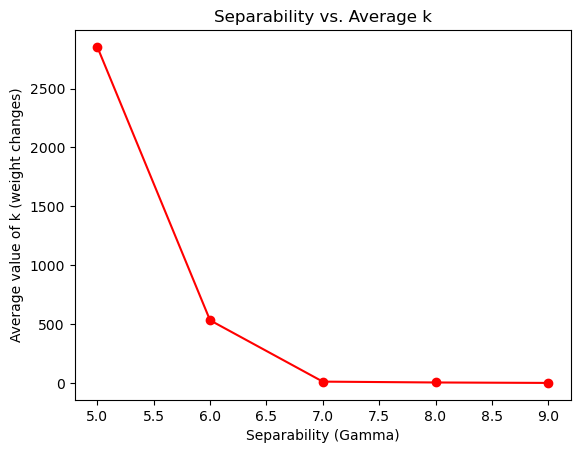

In [7]:
# Combing gamma and k_list in a dictionary
gamma_klist_combined = dict(zip(gamma, k_list))

# Sorting the dictionary by keys (gamma values) for better presentation of the graph
sorted_gamma_klist_combined = dict(sorted(gamma_klist_combined.items()))

# Plotting the graph with title, axis labels and legend
plt.plot(list(sorted_gamma_klist_combined.keys()), list(sorted_gamma_klist_combined.values()), marker='o', linestyle='-', color='red')
plt.xlabel('Separability (Gamma)')
plt.ylabel('Average value of k (weight changes)')
plt.title('Separability vs. Average k')

# Displaying the graph
plt.show()

## Observation

As can be seen from the above graph, the average value of k decreases as we increase the gamma (separability) value. This is because, more the clusters are spaced, greater is the ease to separate them both with a classifier and thus lesser the number of weight changes required (k).

In [8]:
print("-"*230)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Q2

### Dataset Creation

In [9]:
# Set a random seed for reproducibility
np.random.seed(42)

# Number of data points per class
num_points = 500

# Initialise covariance matrix
cov = np.array([[1, 0], [0, 1]])

# Generate class 0 points
class0_x = np.random.multivariate_normal((-2, -2), cov, num_points)
class0_y = np.zeros(num_points)

# Generate class 1 points
class1_x = np.random.multivariate_normal((4, 4), cov, num_points)
class1_y = np.ones(num_points)

# Combine the data points and create labels
x_data = np.concatenate((class0_x, class1_x))
y_data = np.concatenate((class0_y, class1_y))

### Dataset Plotting

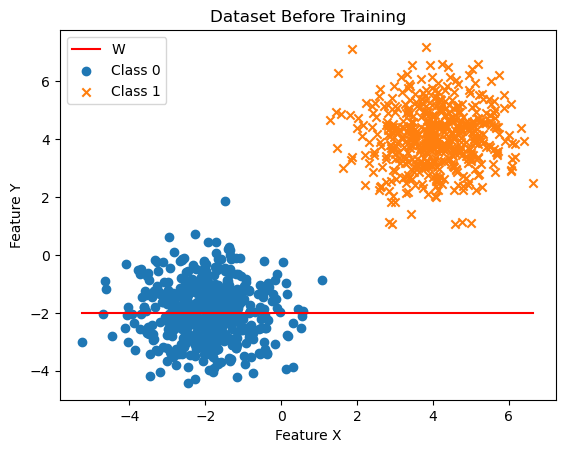

In [10]:
# Plot the dataset before training

# X axis values
X = np.linspace(min(x_data[:, 0]), max(x_data[:, 0]),100)

# Default Y axis values
Y = np.full(100, -2)

# Plotting initially untrained classifier
plt.plot(X, Y, '-r', label='W')

# Plotting points of class 0
plt.scatter(class0_x[:, 0], class0_x[:, 1], label='Class 0', marker='o')

# Plotting points of class 1
plt.scatter(class1_x[:, 0], class1_x[:, 1], label='Class 1', marker='x')

# Plotting dataset with title, axis labels and legend
plt.title('Dataset Before Training')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()

# Displaying the graph
plt.show()

## Cross Entropy Loss Function

In [11]:
# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred, x):
    
    # Using the cross entropy loss formula
    loss = -((y_true * np.log(y_pred)) + ((1 - y_true) * np.log(1 - y_pred)))
    
    # Calculating derivative of cross entropy loss w.r.t weights
    derivative_loss_weight = (y_pred - y_true) * x
    
    # Calculating derivative of cross entropy loss w.r.t bias 
    derivative_loss_bias = (y_pred - y_true)
    
    # Returning loss and derivative values
    return (loss, derivative_loss_weight, derivative_loss_bias)

### Sigmoid Function

In [12]:
# Sigmoid function used as Activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Gradient Function

In [13]:
# Calculating average gradient of loss function
def gradient(theta,x,y,b,n):
    
    # Initialising loss and derivatives
    loss,derivative_loss_weight,derivative_loss_bias = 0,0,0
    
    # Iterating over all samples
    for i in range (n):
        
        # Predicting y value (label) for x[i] using weight parameter theta
        y_pred = sigmoid(np.dot(x[i],theta))

        # if y_pred is not same as y's true value (misclassification)
        if(y[i]!=y_pred):
            
            # Calculate cross entropy loss and its derivatives 
            delta_loss, delta_derivative_loss_weight, delta_derivative_loss_bias = cross_entropy_loss(y[i], y_pred, x[i])
            
            # Add derivatives so that loss reaches it's optimum value
            loss+=delta_loss
            derivative_loss_weight+=delta_derivative_loss_weight
            derivative_loss_bias+=delta_derivative_loss_bias

    # Return loss and derivatives averaged over number of samples
    return ((loss/n), (derivative_loss_weight/n), (derivative_loss_bias/n))

## Gradient Descent 

In [14]:
# Gradient Descent Function
def gradient_descent(x,y,theta,num_iterations,bias,learning_rate,Loss_Dict,n):
    
    # Setting initial loss to infinity
    prev_loss = float('inf')
    
    # Initialising
    iter_count=1
    
    # Initalising percentage loss
    loss_percent = 0.0

    # Iterating for maximum (set to 2000) iterations
    for i in range(num_iterations):
        
        # Calling gradient function to compute loss, derivatives of loss
        loss, derivative_loss_weight, derivative_loss_bias = gradient(theta,x,y,bias,n)
        
        # Computing values of theta (weight) and bias using learning rate
        theta -=  (learning_rate*derivative_loss_weight)
        bias -= (learning_rate*derivative_loss_bias)

        # If change in loss is negligible stop iterations
        if(abs(prev_loss-loss)<= 10**(-5)):
            
            # Calculate change in loss percentage
            loss_percent = (prev_loss-loss) * 100
            
            # Printing loss and itertaions required
            print(f"Iteration: {iter_count}\t| Loss: {loss}\t| Percentage loss change: {loss_percent}%")
            print("="*100)
            print("Iterations required: ",iter_count)
            return (theta,bias)

        
        # Prinitng for every 10th iteration
        if (iter_count%10 == 0):
            
            # Calculate change in loss percentage
            loss_percent = (prev_loss-loss) * 100
            
            # Printing loss and itertaion number
            print(f"Iteration: {iter_count}\t| Loss: {loss}\t| Percentage loss change: {loss_percent}%")
            
            # Appending values in a list to plot a graph
            Loss_Dict[iter_count] = loss
        
        # Incrementing iteration counter
        iter_count+=1
        
        # Settting prev_loss and current loss to calculate new loss
        prev_loss = loss


    # Printing number of iterations requires
    print("="*100)
    print("Iterations required: 2000")
    
    # Returning theta(weight) and bias parameters
    return (theta,bias)

### Running Gradient Descent Algorithm

In [15]:
# Initialising values
Loss_Dict = {}

#bias= random.randint(-10, -1)
bias = 0.0

n = x_data.shape[0]

# Initial weights
theta = np.zeros(x_data.shape[1])

# Learning rate
learning_rate = 0.01

# Number of iterations
num_iterations = 2000

# Running gradient descent
Weights, Bias = gradient_descent(x_data,y_data,theta,num_iterations,bias,learning_rate,Loss_Dict,n)

Iteration: 10	| Loss: 0.4212480950946762	| Percentage loss change: 1.9485804772657656%
Iteration: 20	| Loss: 0.2947742649076985	| Percentage loss change: 0.8822596494701185%
Iteration: 30	| Loss: 0.23066048643368073	| Percentage loss change: 0.4940124828511916%
Iteration: 40	| Loss: 0.19203315138004795	| Percentage loss change: 0.31625978436718993%
Iteration: 50	| Loss: 0.1660890686806942	| Percentage loss change: 0.2208950888221095%
Iteration: 60	| Loss: 0.14735777533901456	| Percentage loss change: 0.16382932527488903%
Iteration: 70	| Loss: 0.133127961034447	| Percentage loss change: 0.12690250674801118%
Iteration: 80	| Loss: 0.12190421171764323	| Percentage loss change: 0.10157223299884222%
Iteration: 90	| Loss: 0.11279332297593149	| Percentage loss change: 0.08339762744032919%
Iteration: 100	| Loss: 0.10522801781392495	| Percentage loss change: 0.06988431055863636%
Iteration: 110	| Loss: 0.09883007525024988	| Percentage loss change: 0.05954245450152801%
Iteration: 120	| Loss: 0.093

Iteration: 910	| Loss: 0.025745856291356947	| Percentage loss change: 0.0017156401953592748%
Iteration: 920	| Loss: 0.025576011216827586	| Percentage loss change: 0.001684523074743996%
Iteration: 930	| Loss: 0.025409228524124756	| Percentage loss change: 0.0016542975249198705%
Iteration: 940	| Loss: 0.025245420980909702	| Percentage loss change: 0.0016249288140403328%
Iteration: 950	| Loss: 0.02508450473346924	| Percentage loss change: 0.0015963839139061103%
Iteration: 960	| Loss: 0.024926399141933935	| Percentage loss change: 0.0015686313995278561%
Iteration: 970	| Loss: 0.02477102662515364	| Percentage loss change: 0.0015416413556398195%
Iteration: 980	| Loss: 0.02461831251457268	| Percentage loss change: 0.0015153852894994602%
Iteration: 990	| Loss: 0.024468184916494502	| Percentage loss change: 0.0014898360495750607%
Iteration: 1000	| Loss: 0.02432057458217726	| Percentage loss change: 0.0014649677496710034%
Iteration: 1010	| Loss: 0.024175414785239335	| Percentage loss change: 0.0

### Printing Weights and Bias obtained using Gradient Descent

In [16]:
print("Weights calculated using Gradient Descent are: ",Weights[0]," and ", Weights[1])
print("\n Bias calculated using Gradient Descent is: ", Bias)

Weights calculated using Gradient Descent are:  1.0505562457061222  and  1.015387657764142

 Bias calculated using Gradient Descent is:  -0.4178608205672996


### Plotting the classifier trained using Gradient Descent

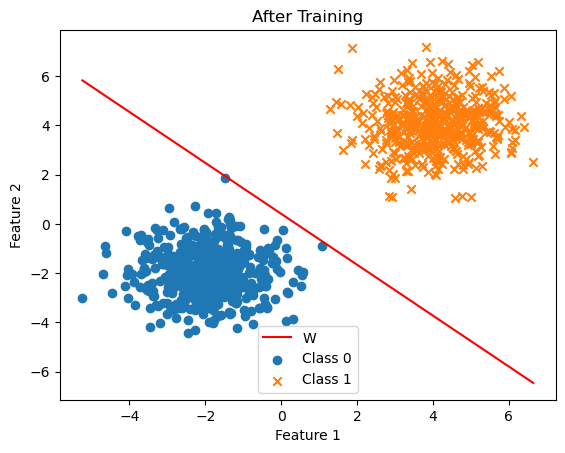

In [17]:
# X axis values
X = np.linspace(min(x_data[:, 0]), max(x_data[:, 0]),100)

# Learned Y-axis values
Y = ((-Weights[0] * X - Bias) / Weights[1])

# Plotting the trained classifier
plt.plot(X, Y, '-r', label='W')

# Plotting points of class 0
plt.scatter(class0_x[:, 0], class0_x[:, 1], label='Class 0', marker='o')

# Plotting points of class 1
plt.scatter(class1_x[:, 0], class1_x[:, 1], label='Class 1', marker='x')

# Plotting dataset, trained classifer with title, axis labels and legend
plt.title('After Training')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Comparing the results side-by-side before and after Gradient Descent

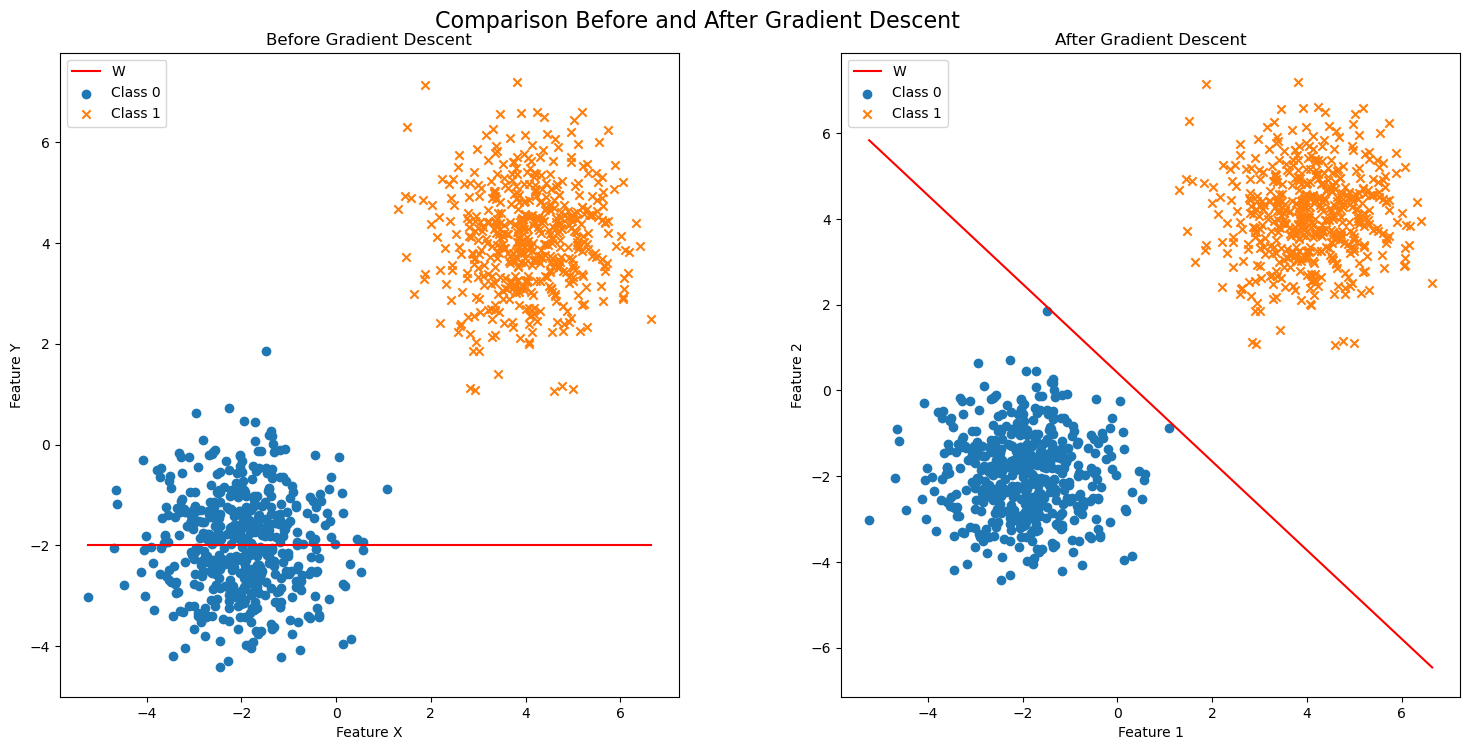

In [18]:
# Plot the dataset before training
plt.subplot(1, 2, 1)

Y_before_training = np.full(100, -2)

plt.plot(X, Y_before_training, '-r', label='W')
plt.scatter(class0_x[:, 0], class0_x[:, 1], label='Class 0', marker='o')
plt.scatter(class1_x[:, 0], class1_x[:, 1], label='Class 1', marker='x')
plt.title('Before Gradient Descent')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()

# Plot the trained classifier
plt.subplot(1, 2, 2)

plt.plot(X, Y, '-r', label='W')
plt.scatter(class0_x[:, 0], class0_x[:, 1], label='Class 0', marker='o')
plt.scatter(class1_x[:, 0], class1_x[:, 1], label='Class 1', marker='x')
plt.title('After Gradient Descent')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

plt.gcf().set_size_inches(16, 8)
plt.suptitle('Comparison Before and After Gradient Descent', fontsize=16)

# Display the plots
plt.show()

### Plotting Loss against Number of Iterations

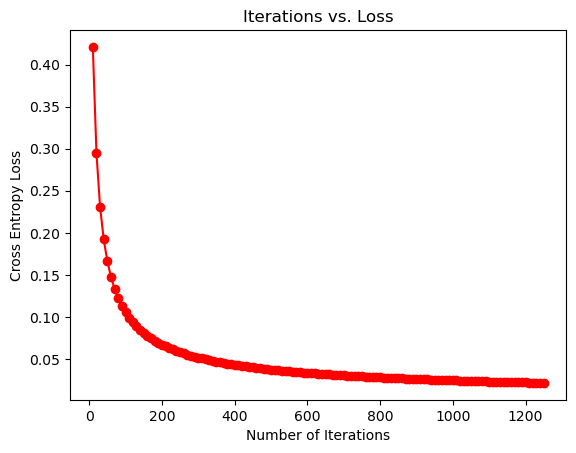

In [19]:
# Plotting the loss against iterations
plt.plot(list(Loss_Dict.keys()), list(Loss_Dict.values()), marker='o', linestyle='-', color='red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cross Entropy Loss')
plt.title('Iterations vs. Loss')

# Displaying the graph
plt.show()

In [20]:
print("-"*230)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Q3

### Generate dataset not linearly separable in 2D

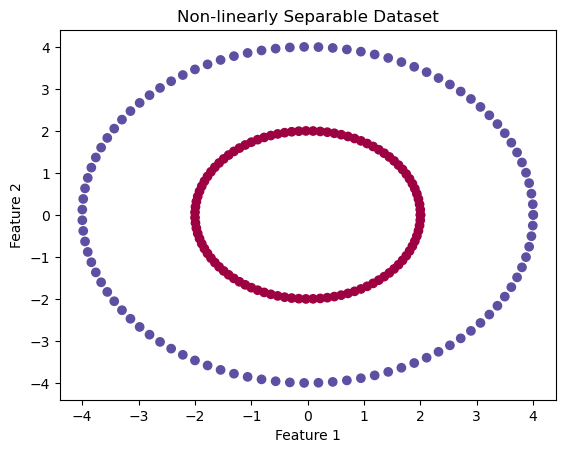

2

In [21]:
def generate_non_linearly_separable_data(num_samples):
    # Generate data on the circumference of two concentric circles
    theta = np.linspace(0, 2*np.pi, num_samples)
    inner_radius = 2
    outer_radius = 4

    # Inner circle
    inner_circle_x = inner_radius * np.cos(theta)
    inner_circle_y = inner_radius * np.sin(theta)

    # Outer circle
    outer_circle_x = outer_radius * np.cos(theta)
    outer_circle_y = outer_radius * np.sin(theta)

    # Combine inner and outer circles
    X = np.vstack((np.column_stack((inner_circle_x, inner_circle_y)),
                   np.column_stack((outer_circle_x, outer_circle_y))))

    # Labels (0 for inner circle, 1 for outer circle)
    y = np.concatenate([np.zeros(num_samples), np.ones(num_samples)])

    return X, y

# Generate non-linearly separable dataset
num_samples = 100
X, y = generate_non_linearly_separable_data(num_samples)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Non-linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
X.shape[1]

### Initializing all parameters

In [22]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

### Sigmoid Function

In [23]:
# Sigmoid function used as Activation function in input & hidden layers
def sigmoid_func(x):
    return 1 / (1 + np.exp(-x))

### Sigmoid Derivative Function

In [24]:
# Sigmoid Derivative to find dervative of output post-activation w.r.t to input pre-activation
def sigmoid_derivative(x):
    return x * (1 - x)

### Softmax Function

In [25]:
# Softmax function used as Activation function at output layer
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

### Cross Entropy Loss Function

In [26]:
# Using Cross-entropy loss function
def cross_entropy_loss_func(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred)) / len(y_true)

## Forward Propagation

In [27]:
def forward_propagation(X, W1, b1, W2, b2):
    # Linear transformation for the first layer
    a1 = np.dot(X, W1) + b1
    
    # Activation function (Sigmoid) applied to the first layer
    h1 = sigmoid_func(a1)
    
    # Linear transformation for the second layer
    a2 = np.dot(h1, W2) + b2
    
    # Activation function (Softmax) applied to the second layer
    y_pred_h2 = softmax(a2)
    
    # Return the output of the first hidden layer and the final predicted output
    return h1, y_pred_h2

## Backpropagation

In [28]:
def backward_propagation(X, y, h1, y_pred_h2, W2, b2):
    # Compute the error in the final predicted output
    output_error = y_pred_h2 - y
    
    # Compute the error in the hidden layer using the derivative of the sigmoid activation
    hidden_error = output_error.dot(W2.T) * sigmoid_derivative(h1)

    # Compute the gradient of the weight matrix for the second layer
    d_W2 = h1.T.dot(output_error)
    
    # Compute the gradient of the bias vector for the second layer
    d_b2 = np.sum(output_error, axis=0, keepdims=True)
    
    # Compute the gradient of the weight matrix for the first layer
    d_W1 = X.T.dot(hidden_error)
    
    # Compute the gradient of the bias vector for the first layer
    d_b1 = np.sum(hidden_error, axis=0, keepdims=True)

    # Return the gradients for the parameters
    return d_W1, d_b1, d_W2, d_b2

### Updating Parameters

In [29]:
def update_parameters(W1, b1, W2, b2, d_W1, d_b1, d_W2, d_b2, learning_rate):
    # Update the parameters for the first layer
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1
    
    # Update the parameters for the second layer
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2
    
    # Return the updated parameters
    return W1, b1, W2, b2

## Training the MLP

In [30]:
def train_mlp(X, y, hidden_size, learning_rate, epochs):
    input_size = 2
    #input_size = X.shape[1]
    output_size = 2   # Binary classification

    W1, b1, W2, b2 = initialize_parameters(
        input_size, hidden_size, output_size)

    for epoch in range(epochs):
        # Forward propagation
        h1, y_pred_h2 = forward_propagation(X, W1, b1, W2, b2)

        # Convert labels to one-hot encoding
        y_one_hot = np.eye(2)[y.astype(int)]

        # Compute and print loss
        loss = cross_entropy_loss_func(y_one_hot, y_pred_h2)

        if (epoch%100 == 0):
            if (epoch<1000):
                print(f"Epoch {epoch + 1}/{epochs}\t\t|\t Loss: {loss:.4f}") 
            else:
                print(f"Epoch {epoch + 1}/{epochs}\t|\t Loss: {loss:.4f}") 

        # Backward propagation
        d_W1, d_b1, d_W2, d_b2 = backward_propagation(X, y_one_hot, h1, y_pred_h2,W2, b2)

        # Update parameters
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2,d_W1, d_b1, d_W2, d_b2,learning_rate)

    return W1, b1, W2, b2

### Output layer prediction

In [31]:
def predict_function(X, W1, b1, W2, b2):
    H1, y_pred_h2 = forward_propagation(X, W1, b1, W2, b2)
    return np.argmax(y_pred_h2, axis=1)

### Running the MLP

In [32]:
# Generate non-linearly separable dataset
num_samples = 100
X, y = generate_non_linearly_separable_data(num_samples)

# Hyperparameters
hidden_size = 4
learning_rate = 0.01
epochs = 10000

# Train the MLP for 10000 epochs
W1_1, b1_1, W2_1, b2_1 = train_mlp(X, y, hidden_size, learning_rate, epochs)

print("-"*115)
# Train the MLP for 10 epochs
epochs = 10
W1_2, b1_2, W2_2, b2_2 = train_mlp(X, y, hidden_size, learning_rate, epochs)


Epoch 1/10000		|	 Loss: 0.7708
Epoch 101/10000		|	 Loss: 0.1646
Epoch 201/10000		|	 Loss: 0.0573
Epoch 301/10000		|	 Loss: 0.0338
Epoch 401/10000		|	 Loss: 0.0239
Epoch 501/10000		|	 Loss: 0.0185
Epoch 601/10000		|	 Loss: 0.0151
Epoch 701/10000		|	 Loss: 0.0128
Epoch 801/10000		|	 Loss: 0.0111
Epoch 901/10000		|	 Loss: 0.0098
Epoch 1001/10000	|	 Loss: 0.0088
Epoch 1101/10000	|	 Loss: 0.0080
Epoch 1201/10000	|	 Loss: 0.0073
Epoch 1301/10000	|	 Loss: 0.0067
Epoch 1401/10000	|	 Loss: 0.0062
Epoch 1501/10000	|	 Loss: 0.0058
Epoch 1601/10000	|	 Loss: 0.0054
Epoch 1701/10000	|	 Loss: 0.0051
Epoch 1801/10000	|	 Loss: 0.0048
Epoch 1901/10000	|	 Loss: 0.0046
Epoch 2001/10000	|	 Loss: 0.0044
Epoch 2101/10000	|	 Loss: 0.0041
Epoch 2201/10000	|	 Loss: 0.0040
Epoch 2301/10000	|	 Loss: 0.0038
Epoch 2401/10000	|	 Loss: 0.0036
Epoch 2501/10000	|	 Loss: 0.0035
Epoch 2601/10000	|	 Loss: 0.0034
Epoch 2701/10000	|	 Loss: 0.0032
Epoch 2801/10000	|	 Loss: 0.0031
Epoch 2901/10000	|	 Loss: 0.0030
Epoch 3001/1

### Plotting the classified points

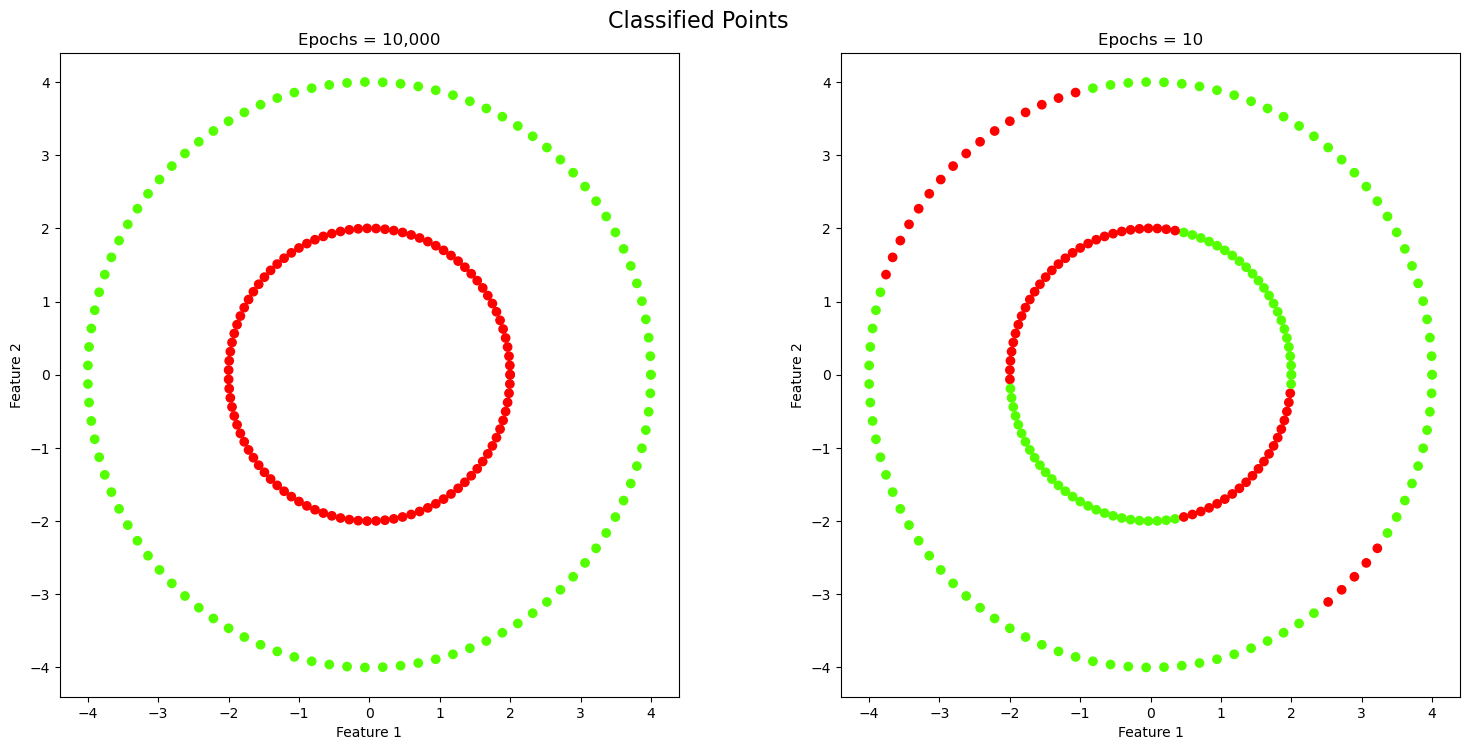

In [33]:
predictions_1 = predict_function(X, W1_1, b1_1, W2_1, b2_1)
predictions_2 = predict_function(X, W1_2, b1_2, W2_2, b2_2)

# Plot only the points classified
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=predictions_1, cmap=plt.cm.prism)
plt.title('Epochs = 10,000')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=predictions_2, cmap=plt.cm.prism)
plt.title('Epochs = 10')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.gcf().set_size_inches(16, 8)
plt.suptitle('Classified Points', fontsize=16)
plt.show()

## Plotting the decision boundary

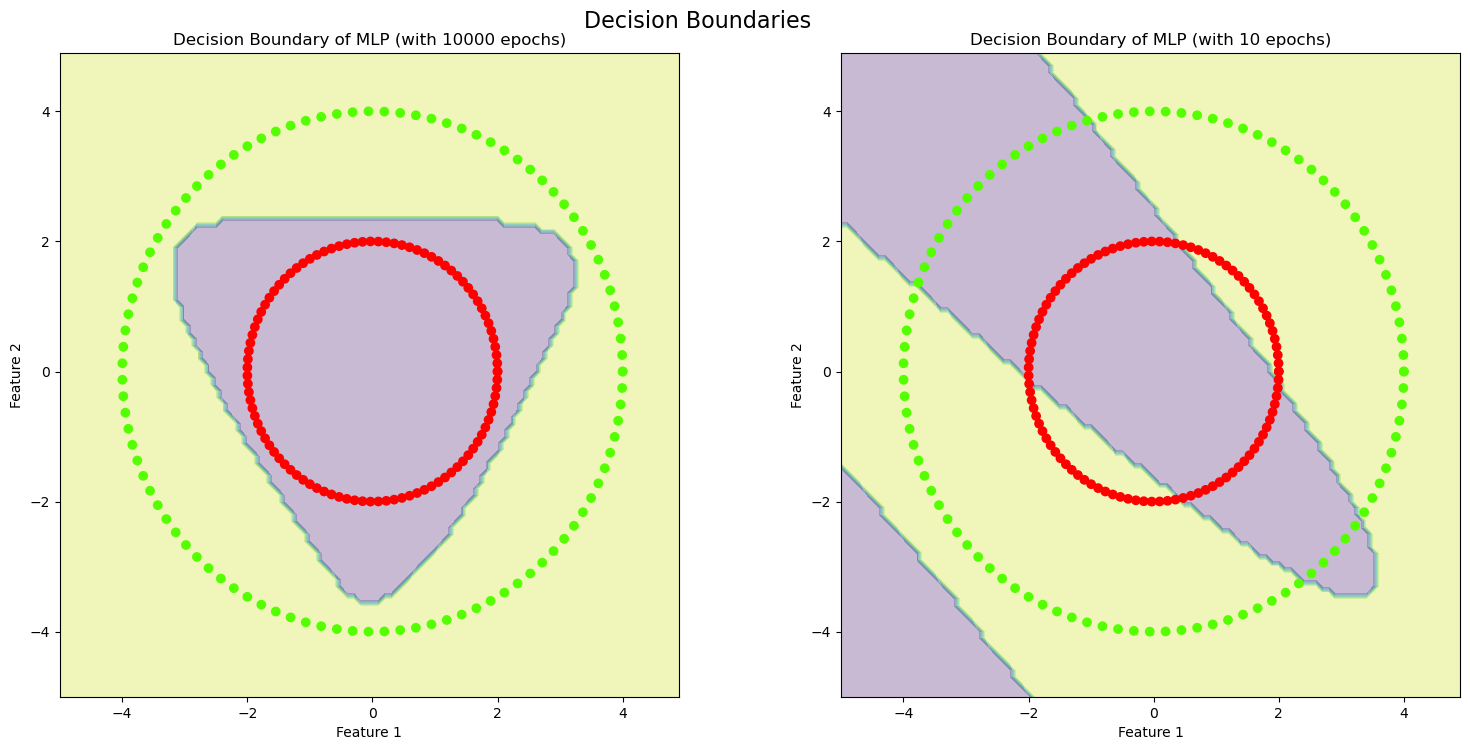

In [35]:
# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z1 = predict_function(np.c_[xx.ravel(), yy.ravel()], W1_1, b1_1, W2_1, b2_1)
Z1 = Z1.reshape(xx.shape)
Z2 = predict_function(np.c_[xx.ravel(), yy.ravel()], W1_2, b1_2, W2_2, b2_2)
Z2 = Z2.reshape(xx.shape)

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z1, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.prism)
plt.title('Decision Boundary of MLP (with 10000 epochs)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z2, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.prism)
plt.title('Decision Boundary of MLP (with 10 epochs)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


plt.tight_layout()
plt.gcf().set_size_inches(16, 8)
plt.suptitle('Decision Boundaries', fontsize=16)
plt.show()